In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [14]:
actMath_11_encoded_df = pd.read_csv('../dataframes/actMath_11_encoded_df.csv')

Act Math encoded, label is proficient_score

In [15]:
actMath_11_encoded_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,...,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.264706,True,False,False,False,0,0,0,...,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.264706,True,False,False,False,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#turning bools into ints
actMath_11_encoded_df[actMath_11_encoded_df.select_dtypes(include=['bool']).columns] = actMath_11_encoded_df.select_dtypes(include=['bool']).astype(int)
actMath_11_encoded_df.dtypes

studentId                        int64
is_proficient                    int64
proficient_score               float64
school_High School A             int64
school_High School B             int64
school_High School C             int64
school_High School D             int64
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS         int64
category_VISUAL_ARTS             int64
category_TECHNOLOGY              int64
category_BUSINESS                int64
category_TRADES                  int64
category_AGRICULTURE             int64
category_PHYSICAL_EDUCATION      int64
category_HEALTH                  int64
category_CAREER_PREP             int64
category_MILITARY_SCIENCE        int64
dtype: object

Training

In [17]:
#training
y= actMath_11_encoded_df['proficient_score']
X= actMath_11_encoded_df.drop(['proficient_score', 'is_proficient', 'studentId'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.20,stratify= actMath_11_encoded_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 2580
(2064, 22)
(516, 22)


In [ ]:
#hyperparameters
'''
max_depth_values = [5,18,23,32]
n_estimators_value = [100,250,300,350]
param_grid = {'max_depth' : list(max_depth_values), 'n_estimators' : list(n_estimators_value)}

#Grid Search to find the best hyperparameters 

print("Running Grid Search")
rf_regressor= RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

print("Done")
rf_best_params_Math_encoded = rf_grid_search.best_params_

rf_best_params_Math_encoded
'''

#{'max_depth': 32, 'n_estimators': 350}

Running Grid Search
Done


{'max_depth': 32, 'n_estimators': 350}

In [23]:
print('Begin Random Forest ')
rf_model = RandomForestRegressor(max_depth=32, n_estimators=350)
rf_model.fit(X_train,y_train)
print('End')

y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2= r2_score(y_test, y_rf_pred)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_bool = y_rf_pred>= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))     

Begin Random Forest 
End
threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.95      0.86       329
        True       0.85      0.53      0.65       187

    accuracy                           0.80       516
   macro avg       0.82      0.74      0.75       516
weighted avg       0.81      0.80      0.78       516

[RF] Root Mean Squared Error: 0.18817810546085287
[RF] R2: 0.3805985929559861


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
#looking at the micro score
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.7965116279069767


Confusion Matrix:
[[311  18]
 [ 88  99]]


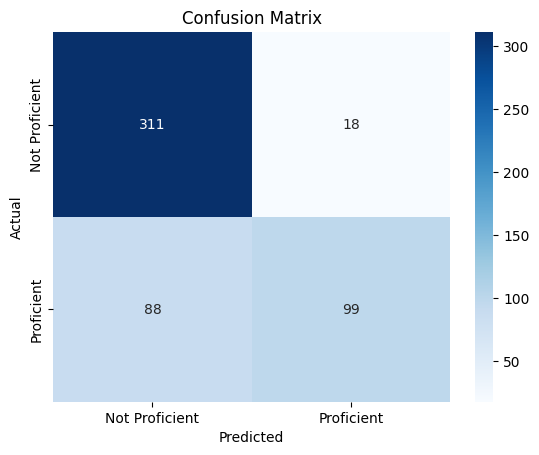

In [21]:
cm = confusion_matrix(y_test_bool, y_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [22]:
#feature importance 
importances_Math_encoded = rf_model.feature_importances_
feature_names_Math_encoded = X_train.columns

# Combine names and importances, and sort
importance_Math_encoded_df = pd.DataFrame({'Feature': feature_names_Math_encoded, 'Importance': importances_Math_encoded})
importance_Math_encoded_df = importance_Math_encoded_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
importance_Math_encoded_df.head(10)

,Feature,Importance
10,category_SOCIAL_STUDIES,0.188458
8,category_ENGLISH,0.164763
9,category_SCIENCE,0.087914
7,category_MATHEMATICS,0.066032
11,category_FOREIGN_LANGUAGE,0.054697
18,category_PHYSICAL_EDUCATION,0.054266
12,category_PERFORMING_ARTS,0.043331
13,category_VISUAL_ARTS,0.040658
21,category_MILITARY_SCIENCE,0.035019
17,category_AGRICULTURE,0.033855
